<a href="https://colab.research.google.com/github/Bomsk/DA2FinalTermProject/blob/main/DA2FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stargazer

In [2]:
# Importing libraries
import warnings
import pandas as pd
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
warnings.filterwarnings("ignore")

In [3]:
# Uploading csv

df = pd.read_csv('https://raw.githubusercontent.com/Bomsk/DA2FinalTermProject/main/heart.csv')

In [4]:
# Examining csv

df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Renaming columns with the variables I will be working with
df.rename(columns={'chol': 'cholesterol_level',
                   'trtbps': 'resting_blood_pressure',
                   'exng': 'exercise_induced_angina'},
          inplace=True)

In [6]:
# Creating a descriptive statistic table
df[['age',
    'cholesterol_level',
    'resting_blood_pressure',
    'exercise_induced_angina']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
cholesterol_level,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0


- **Age**: The average age of individuals in the dataset is approximately 54.37 years, with a standard deviation of about 9.08 years. This indicates a moderate spread around the mean age. The youngest individual is 29 years old, and the oldest is 77 years old. The interquartile range (IQR), which is the range between the 25th and 75th percentile, is from about 47.5 to 61 years, suggesting that half of the individuals are within this age range.

- **Cholesterol Level**: The average cholesterol level is roughly 246.26 mg/dL, with a standard deviation of 51.83 mg/dL, indicating a relatively wide variability in cholesterol levels among individuals. The cholesterol levels range from 126 to 564 mg/dL, which is quite a broad range. The IQR is from 211 to 274.5 mg/dL, showing that the middle 50% of individuals have cholesterol levels within this range.

- **Resting Blood Pressure**: The mean resting blood pressure is 131.62 mmHg, with a standard deviation of 17.54 mmHg, which suggests a moderate variation in blood pressure readings among the population. The minimum blood pressure recorded is 94 mmHg, and the maximum is 200 mmHg. The IQR is from 120 to 140 mmHg, meaning that half of the observed blood pressures lie within this range.

- **Exercise Induced Angina**: This binary variable has values of 0 or 1, where 0 likely indicates the absence of exercise-induced angina and 1 indicates its presence. On average, about 32.67% of individuals have exercise-induced angina. Since this is a binary variable, the standard deviation isn't particularly informative about the spread but does indicate variability in the presence of this condition within the group. The min and max values (0 and 1) confirm that it's a binary variable.

The `count` value of 303 for each variable indicates that there are no missing values for these variables in the dataset.

In summary, the table offers a quick statistical snapshot of the data. It suggests that the sample includes a middle-aged adult population with a broad range of cholesterol levels and resting blood pressure readings. Additionally, a significant minority of the population experiences exercise-induced angina. The spread of the data for age and resting blood pressure is moderately wide, whereas cholesterol levels show a wider range, which could be due to various dietary and genetic factors among the individuals. The presence of exercise-induced angina in about a third of the population could be a point of interest for further investigation, especially in relation to other cardiovascular health indicators.

# Guide for Variables in the dataset

- age: Age of the person
- sex: Gender of the person
- cp: Chest pain type
    - 1 = typical angina
    - 2 = atypical angina
    - 3 = non-anginal pain
    - 4 = asymptomatic
- trtbps: Resting blood pressure (mm Hg)
- chol: Cholesterol (mg/dl)
- fbs: Fasting blood sugar (fbs > 120 mg/dl)
    - 0 = false
    - 1 = true
- restecg: Resting electrocardiographic results
    - 0 = normal
    - 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalachh: Maximum heart rate achieved
- exng: Exercise induced angina
    - 0 = no
    - 1 = yes
- oldpeak: Previous peak
- slp: Slope
- caa: Number of major vessels (0-3)
- thall: Thal rate
- output: Target variable
    - 0 = less chance of heart attack
    - 1 = more chance of heart attack

# Deep diving into `Age` variable

In [7]:
df.sort_values(by='age',ascending = True)

,age,sex,cp,resting_blood_pressure,cholesterol_level,fbs,restecg,thalachh,exercise_induced_angina,oldpeak,slp,caa,thall,output
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


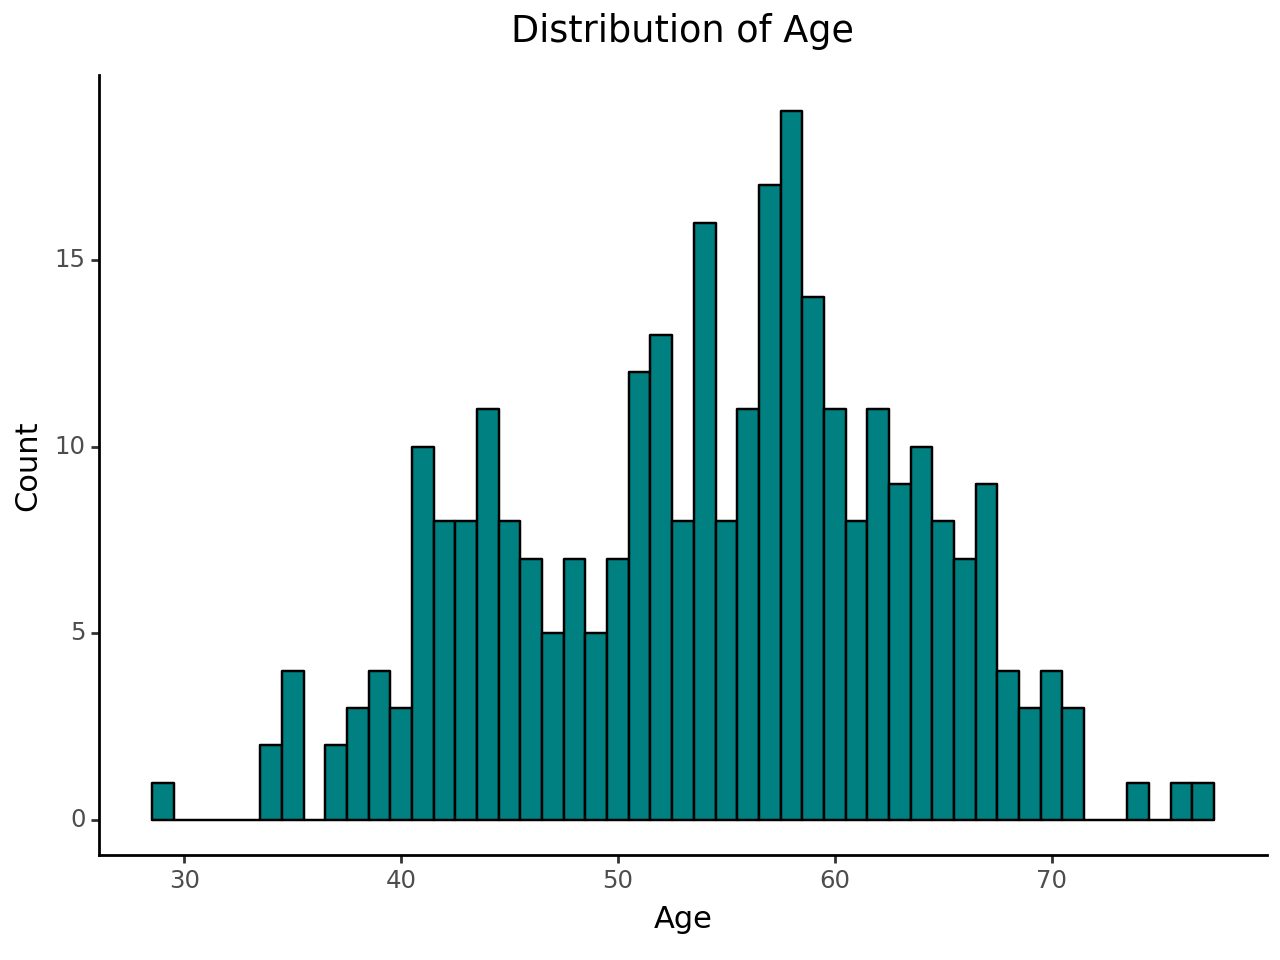

<Figure Size: (640 x 480)>

In [8]:
# Histogram for 'age'
fig_age = (
        ggplot(df, aes(x='age')) +
        geom_histogram(binwidth=1, fill='teal', color='black') +
        theme(
            panel_background=element_blank(),
            panel_grid_major=element_blank(),
            panel_grid_minor=element_blank(),
            axis_line=element_line(color="black"),
            plot_title=element_text(hjust=0.5)
        ) +
        ggtitle('Distribution of Age') +
        xlab('Age') +
        ylab('Count')
    )

fig_age

The histogram reveals that the dataset primarily consists of middle-aged adults, with the highest concentration in their late 50s. There is a decline in frequency both towards the younger and older ends of the age spectrum, with individuals aged 29 and 77 representing the lower and upper bounds of the dataset, respectively. The right skewness and multiple peaks suggest variability in the age distribution that could reflect underlying demographic patterns or cohort effects within the population from which the sample was drawn.

# Deep diving into `Sex` variable

In [9]:
# Renaming variables in the 'sex' column
# Because the dataset didn't specify which value corresponds to each gender
# Assuming 0 = female, and 1 = male
df['sex'] = df['sex'].map({0: 'female', 1: 'male'})

In [10]:
df

,age,sex,cp,resting_blood_pressure,cholesterol_level,fbs,restecg,thalachh,exercise_induced_angina,oldpeak,slp,caa,thall,output
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,0


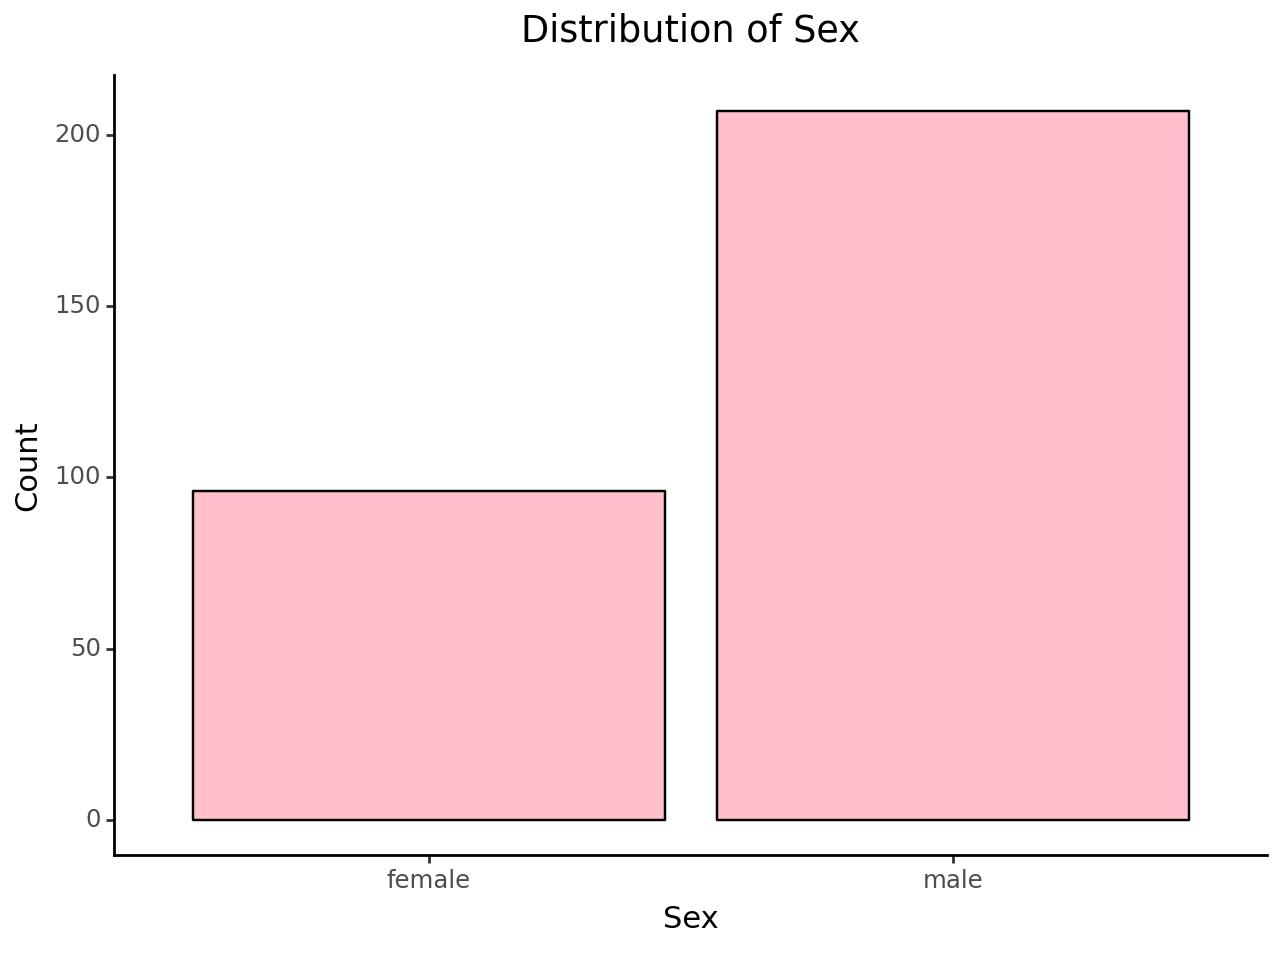

<Figure Size: (640 x 480)>

In [11]:
# Histogram for 'sex'
fig_sex = (
        ggplot(df, aes(x='factor(sex)')) +
        geom_bar(fill='pink', color='black') +
        ggtitle('Distribution of Sex') +
        xlab('Sex') +
        ylab('Count') +
        theme(
            panel_background=element_blank(),
            panel_grid_major=element_blank(),
            panel_grid_minor=element_blank(),
            axis_line=element_line(color="black"),
            plot_title=element_text(hjust=0.5)
        )
    )

fig_sex

# Regressions

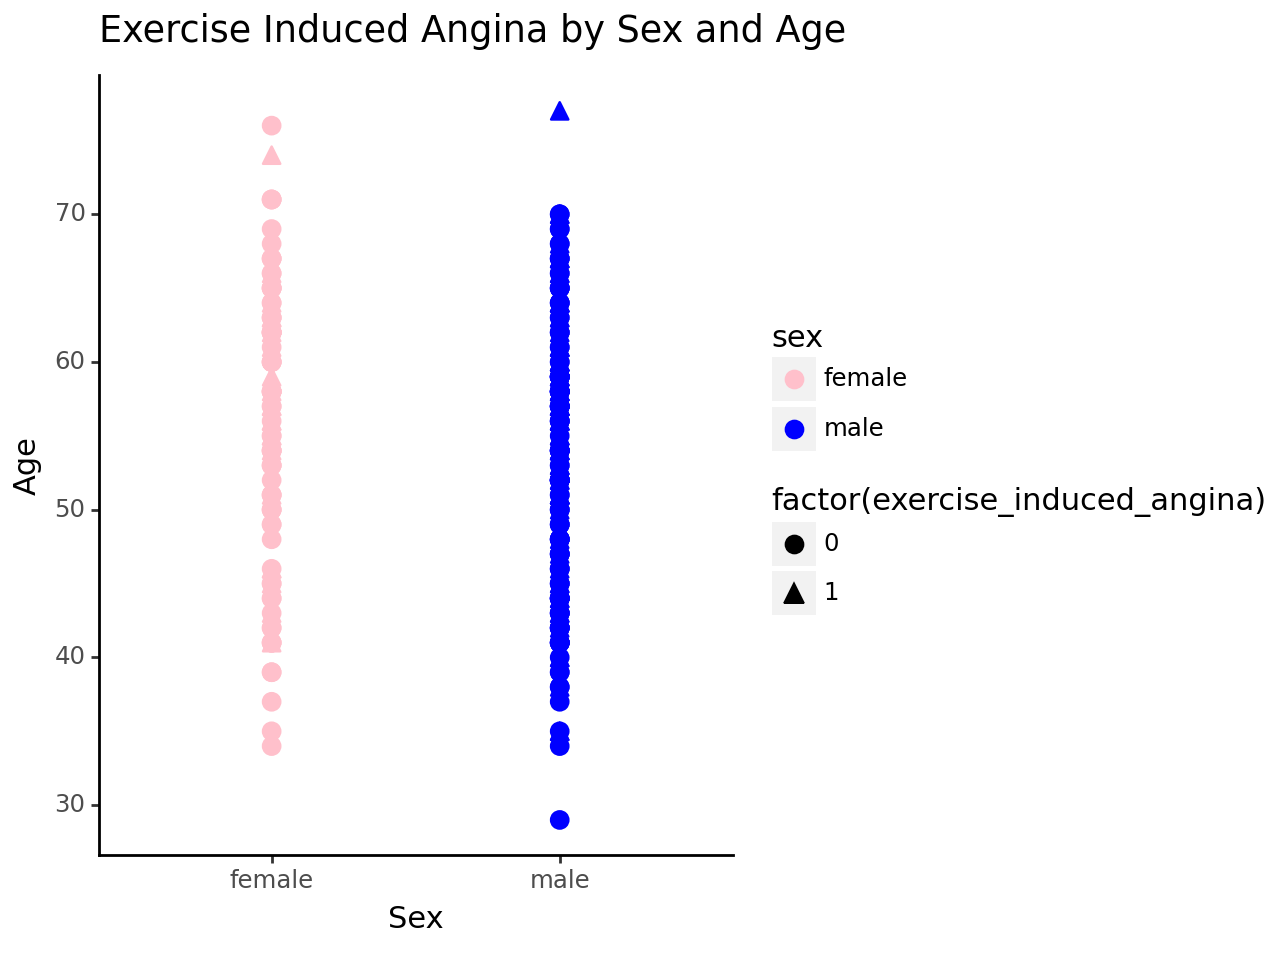

<Figure Size: (640 x 480)>

In [12]:
# Scatterplot for Exercise Induced Angina
fig_eia = (
    ggplot(df, aes(x='sex', y='age', color='sex')) +
    geom_point(aes(shape='factor(exercise_induced_angina)'), size=3) +
    scale_color_manual(values={'male': 'blue', 'female': 'pink'}) +
    ggtitle('Exercise Induced Angina by Sex and Age') +
    xlab('Sex') +
    ylab('Age') +
    theme(
        panel_background=element_blank(),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color="black")
    )
)

fig_eia

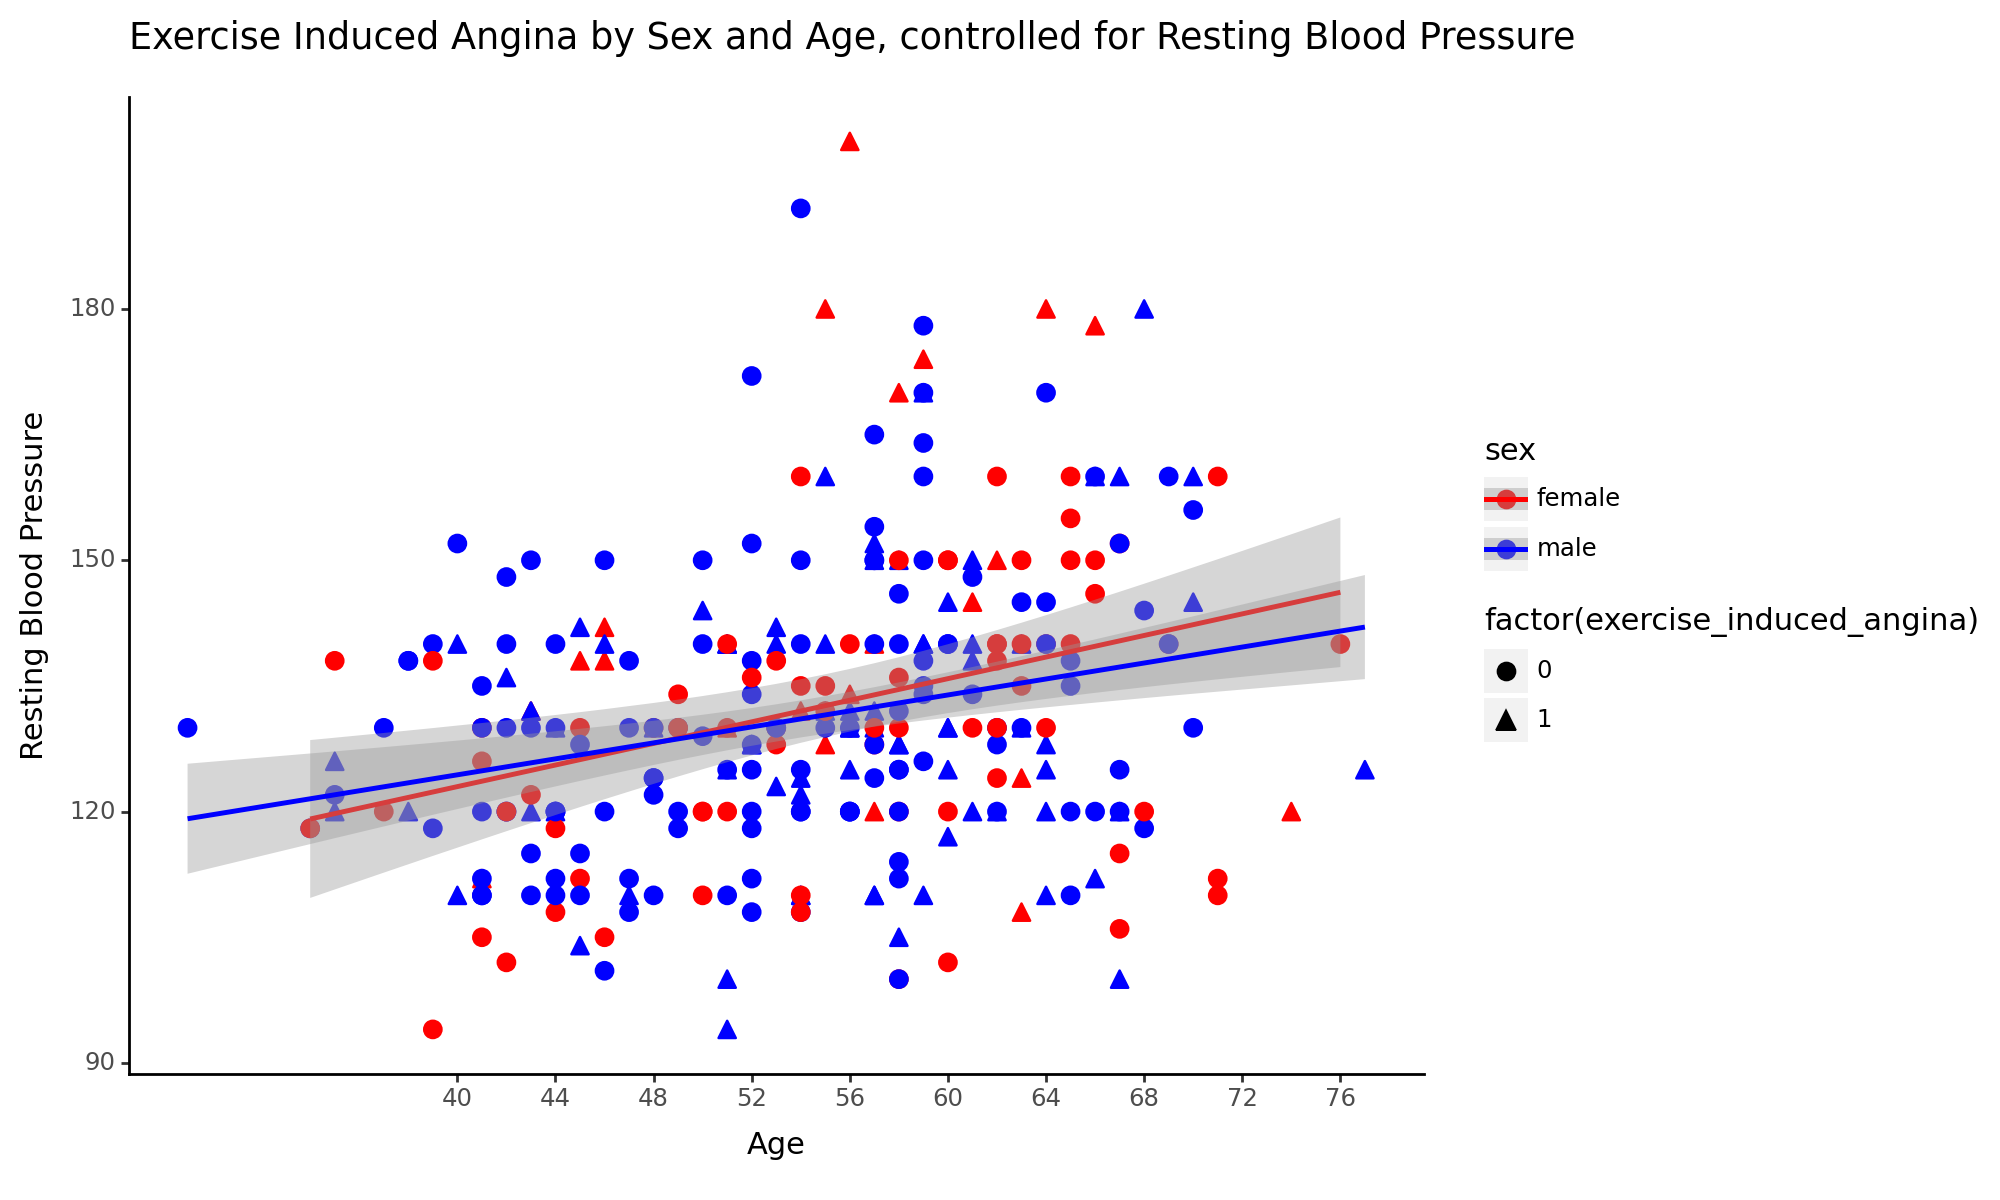

<Figure Size: (1000 x 600)>

In [13]:
# Scatter plot with regression for Resting Blood Pressure
fig_rbp = (
    ggplot(df, aes(x='age', y='resting_blood_pressure', color='sex')) +
    geom_point(aes(shape='factor(exercise_induced_angina)'), size=3) +
    geom_smooth(aes(group='sex'), method='lm', formula='y ~ x', size=1) +
    scale_color_manual(values={'male': 'blue', 'female': 'red'}) +
    ggtitle('Exercise Induced Angina by Sex and Age, controlled for Resting Blood Pressure') +
    xlab('Age') +
    ylab('Resting Blood Pressure') +
    scale_x_continuous(breaks=range(40, 101, 4)) +
    theme(
        panel_background=element_blank(),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color="black"),
        figure_size=(10, 6)
    )
)

fig_rbp

The graph provided is a scatter plot with regression lines, illustrating the relationship between age and resting blood pressure, differentiated by sex and marked for the presence of exercise-induced angina. The points are color-coded: blue represents male and red represents female. Additionally, the shape of the points indicates whether exercise-induced angina is present (triangles) or not (circles).

Analyzing the chart:

- **Age and Resting Blood Pressure Relationship**: There is a general upward trend in resting blood pressure with age, as indicated by the regression lines. This suggests that older individuals tend to have higher resting blood pressure.

- **Sex Differentiation**: The regression lines for males and females appear to have different slopes, with the male (blue) line being steeper than the female (red) line. This could imply that the increase in blood pressure with age is more pronounced in males compared to females in this dataset.

- **Exercise-Induced Angina**: The scatter points are differentiated by shape based on the presence of exercise-induced angina. Triangles, which represent individuals with exercise-induced angina, are present across the age spectrum for both sexes. However, without a clear pattern distinguishing the triangles from circles, it's difficult to infer a strong relationship between age, sex, and the presence of angina from this graph alone.

- **Confidence Interval**: The shaded area around the regression lines represents the confidence interval for the linear regression estimate. A wider shaded area would indicate more uncertainty in the estimate. In this graph, the confidence intervals seem moderately wide, suggesting some variability in the blood pressure readings that isn't explained solely by age.

- **Population Distribution**: The distribution of points shows a relatively even spread across age groups, with a concentration of data points in the middle age range. Both younger and older ages have fewer data points, which is typical in many biomedical datasets.

- **Outliers**: There seem to be a few potential outliers, especially in the higher blood pressure readings for given ages, which appear as points far from the general cluster of data.

In summary, the graph indicates a positive correlation between age and resting blood pressure, with possible sex differences in this relationship. The presence of exercise-induced angina is noted but does not display a distinct pattern in relation to age or resting blood pressure. The regression analysis, while informative, shows that there is considerable variation in blood pressure that may be influenced by factors not included in the graph, such as lifestyle or genetic predispositions.

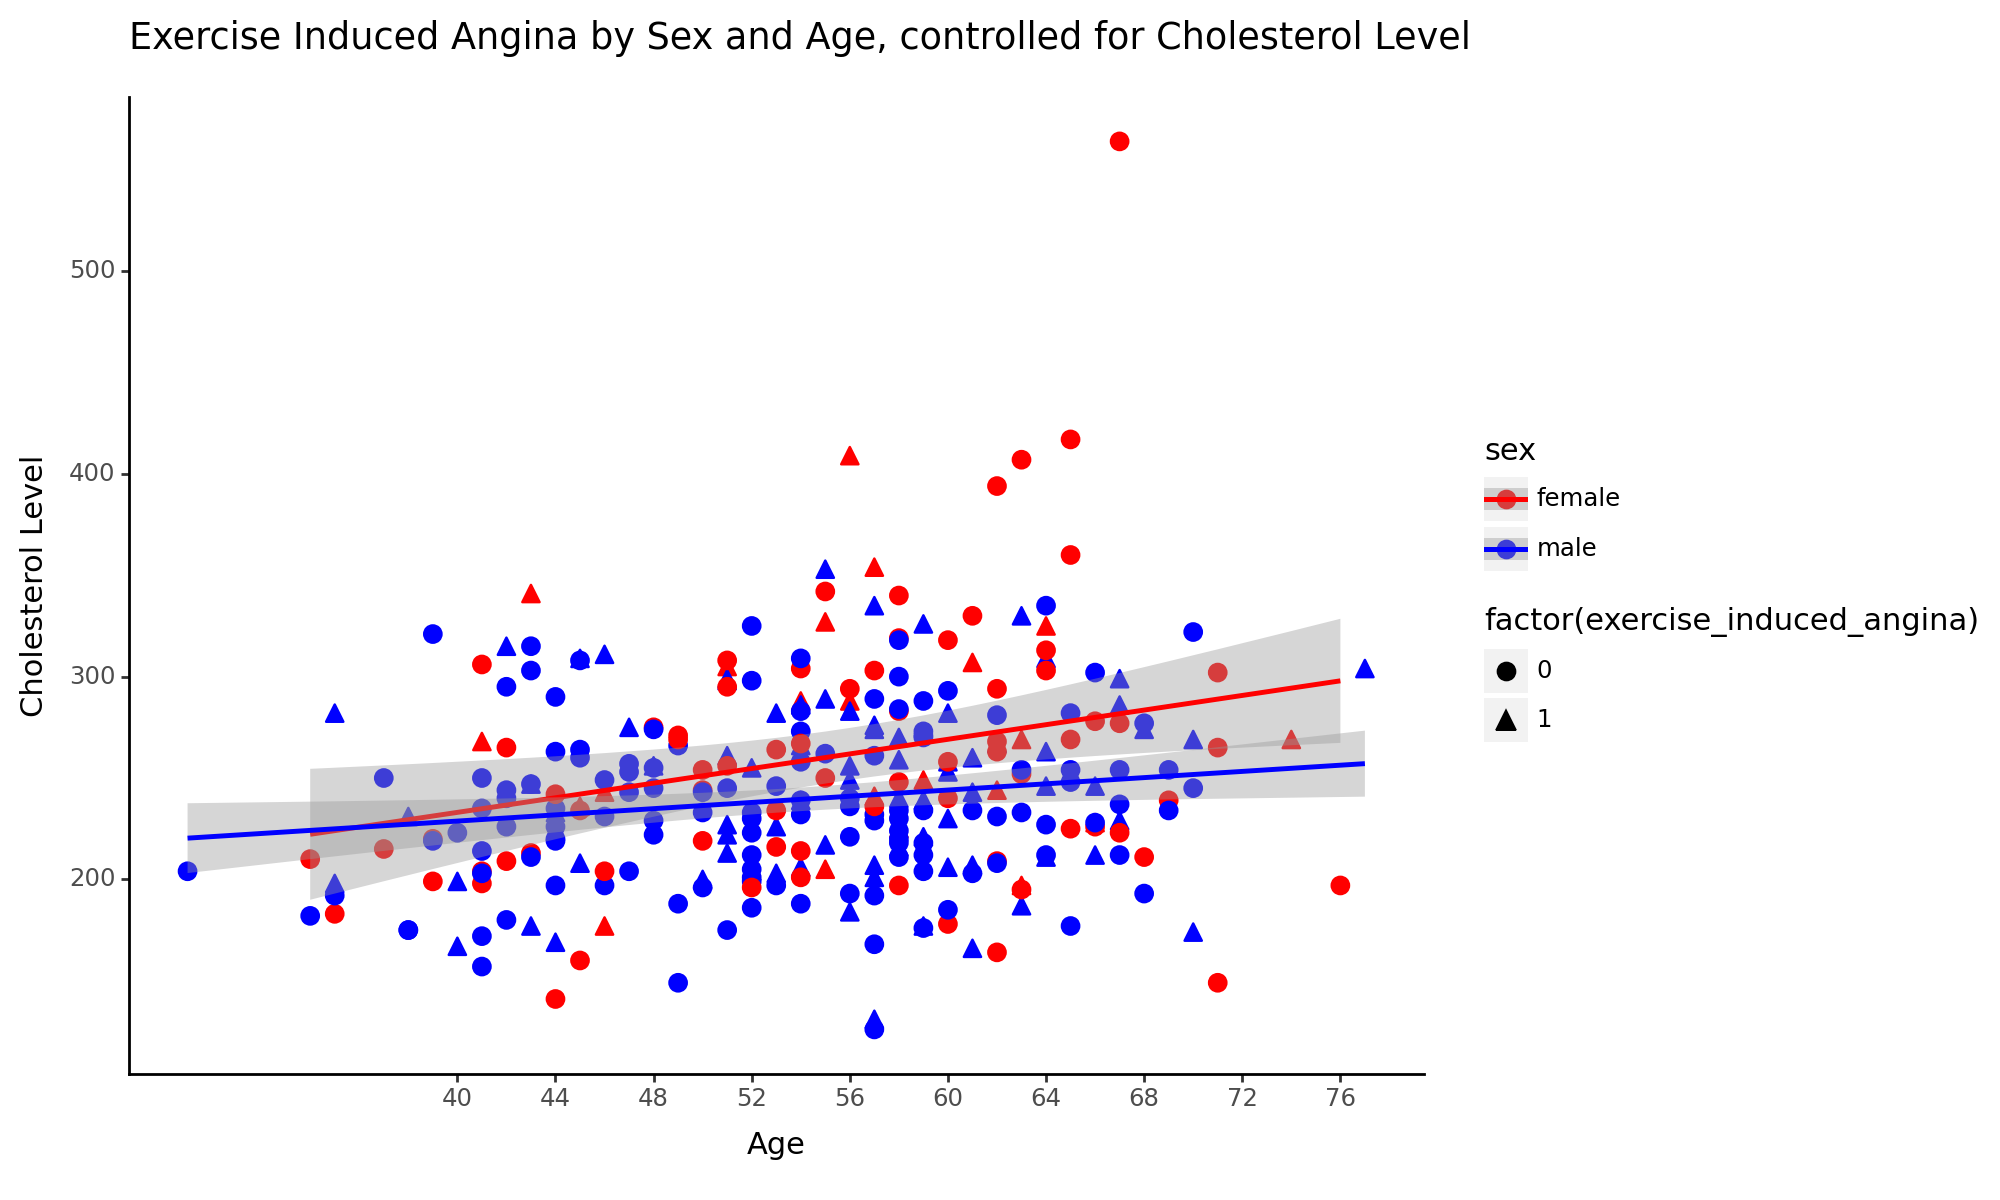

<Figure Size: (1000 x 600)>

In [14]:
# Scatter plot with regression for Cholesterol Level
fig_cl = (
    ggplot(df, aes(x='age', y='cholesterol_level', color='sex')) +
    geom_point(aes(shape='factor(exercise_induced_angina)'), size=3) +
    geom_smooth(aes(group='sex'), method='lm', formula='y ~ x', size=1) +
    scale_color_manual(values={'male': 'blue', 'female': 'red'}) +
    ggtitle('Exercise Induced Angina by Sex and Age, controlled for Cholesterol Level') +
    xlab('Age') +
    ylab('Cholesterol Level') +
    scale_x_continuous(breaks=range(40, 101, 4)) +
    theme(
        panel_background=element_blank(),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color="black"),
        figure_size=(10, 6)
    )
)

fig_cl

The graph presented is a scatter plot with overlaid regression lines, depicting the relationship between age and cholesterol level, and it's color-coded by sex. Points are also marked to show the presence of exercise-induced angina.

Here's a detailed analysis of the graph:

- **Age and Cholesterol Level Relationship**: The plot indicates a slight positive correlation between age and cholesterol level, as shown by the upward trend in the regression lines. This suggests that as age increases, there's a tendency for cholesterol levels to rise as well.

- **Sex Differentiation**: The plot differentiates between male (blue) and female (red) individuals. The two regression lines suggest there might be different patterns in how cholesterol levels change with age between sexes. However, the slopes of the regression lines for both sexes seem relatively flat, indicating that age may not be a strong predictor of cholesterol level in this dataset.

- **Exercise-Induced Angina**: The points are shaped differently based on whether the individual has exercise-induced angina (triangle) or not (circle). The distribution of triangles among the circles doesn't show a clear pattern that relates the presence of exercise-induced angina with cholesterol level and age.

- **Confidence Interval**: The shaded areas around the regression lines indicate the confidence interval for each regression line. The relatively wide confidence intervals, especially at higher ages, suggest there is considerable uncertainty about the true relationship between age and cholesterol level. This variability implies other factors may influence cholesterol levels in addition to age.

- **Data Distribution**: The spread of points across age groups is even, with a relatively high density of data points in the middle age range. The concentration of points around the middle of the graph reflects the median cholesterol levels and the most common ages in the dataset.

- **Outliers**: There are some apparent outliers, especially in cholesterol levels, where some individuals have significantly higher levels than others in the same age group. These outliers could be due to individual differences in diet, genetics, or other health conditions.

In summary, the graph shows that while there is some increase in cholesterol levels with age, the effect is not pronounced. Both males and females show this trend, but it is not strongly differentiated between the sexes. The presence of exercise-induced angina marked in the data points does not appear to correlate strongly with higher cholesterol levels or with age. The considerable spread of the data points and the wide confidence intervals suggest that other factors may be at play in determining an individual's cholesterol level.